<a href="https://colab.research.google.com/github/shyamilyh/Data-Science-Portfolio-Projects/blob/main/Movie_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Movie Recommender Systems**

##**Project Summary**

This project aims to build a simple movie recommendation system.

Recommender systems are powerful tools used to predict and suggest items or content that a user might be interested in. They play a crucial role in various domains, such as e-commerce, entertainment, social media, and personalized advertising. By analyzing user behavior, preferences, and historical data, recommender systems aim to provide personalized recommendations that enhance user experience, increase engagement, and drive conversions.

Different Types of Recommender Systems:

The most common types of recommender systems:

* Simple Recommender:
The Simple Recommender offers generalized recommnendations to every user based on movie popularity and (sometimes) genre. The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. This model does not give personalized recommendations based on the user.

* Content-Based Recommender: This approach recommends items similar to those a user has liked in the past. It focuses on the features or attributes of the items, such as genre, actors, or keywords in the case of movies. For example, if a user has enjoyed action movies, a content-based system might recommend other action movies with similar themes or actors.

* Collaborative Recommender: This method leverages the collective preferences of a group of users to make recommendations. It assumes that users who have agreed in the past are likely to agree again in the future. Collaborative filtering can be further categorized into two subtypes:

**User-Based:** Recommends items liked by users
with similar tastes to the target user.

**Item-Based:** Recommends items similar to those the target user has liked in the past, based on the preferences of other users who have also liked those items.

* Hybrid Recommender Systems: These systems combine elements of both content-based and collaborative filtering to provide more comprehensive and accurate recommendations. They leverage the strengths of both approaches to overcome limitations and improve overall performance. For example, a hybrid system might use content-based filtering to generate an initial set of recommendations and then refine them using collaborative filtering to incorporate user preferences and social influence.

* Knowledge-Based Recommender Systems: These systems rely on explicit knowledge about user preferences and item characteristics to make recommendations. They often involve rules or constraints defined by experts to guide the recommendation process. Knowledge-based systems are particularly useful when user data is limited or when specific requirements need to be met, such as recommending products within a certain price range or with specific features.

* Demographic-Based Recommender Systems: These systems categorize users based on demographic attributes such as age, gender, location, or occupation. They then recommend items that are popular or relevant to users within the same demographic group. Demographic-based recommendations can be a simple and effective way to personalize recommendations, especially when user data is sparse.

##**Problem Statement**

Develop a movie recommender system that suggests movies to users based on their past behavior and preferences.


**Define Your Business Objective?**

To enhance user engagement and satisfaction by providing personalized movie recommendations that cater to individual tastes and viewing habits, ultimately leading to increased movie consumption and customer retention.

By improving user engagement and satisfaction through personalized recommendations, the business aims to achieve the following:

1. Increased Movie Consumption: When users are presented with relevant and appealing movie suggestions, they are more likely to watch more movies on the platform.

2. Improved Customer Retention: Satisfied users who find value in the recommendations are more likely to continue using the service, reducing churn and increasing customer lifetime value.

3. Enhanced User Experience: Personalized recommendations create a more enjoyable and tailored experience for users, making them feel understood and valued.

We are going to build Simple recommender system

#**1. Know Your Data**

##**Import Libraries**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import warnings; warnings.simplefilter('ignore')

###**Dataset Loading**

In [ ]:
# Load Dataset

md = pd.read_csv('/content/movies_metadata (1).csv')

###**Dataset First View**

In [ ]:
# Dataset First Look
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


#**2. Understanding Your Variables**

In [ ]:
# Dataset Columns
md.columns.tolist()

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

###**Variables Description**

**adult:** Indicates whether the movie is classified as adult content.

**belongs_to_collection:** Identifies if the movie is part of a film series or franchise.

**budget:** The estimated production cost of the movie.

**genres:** The categories or classifications of the movie (e.g., Action, Comedy, Drama).

**homepage:** The official website URL for the movie.

**id:** A unique identifier for each movie within the dataset.

**imdb_id:** The unique identifier for the movie on the Internet Movie Database (IMDb).

**original_language:** The original language in which the movie was produced.

**original_title:** The original title of the movie in its original language.

**overview:** A brief summary or plot description of the movie.

**popularity:** A metric representing the popularity of the movie, often based on views, ratings, or other engagement metrics.

**poster_path:** The file path or URL to the movie's poster image.

**production_companies:** The companies involved in the production of the movie.

**production_countries:** The countries where the movie was produced.

**release_date:** The date when the movie was released to the public.

**revenue:** The total amount of money the movie earned at the box office.

**runtime:** The duration of the movie in minutes.

**spoken_languages:** The languages spoken in the movie.

**status:** The current status of the movie (e.g., Released, Rumored, Post Production).

**tagline:** A short, memorable phrase or slogan associated with the movie.

**title:** The title of the movie, often in the dataset's primary language.

**video:** Indicates whether the movie has an associated video (e.g., trailer or clip).

**vote_average:** The average rating given to the movie by users.

**vote_count:** The number of votes or ratings received by the movie.


###**Dataset Rows & Columns count**

In [ ]:
# Get the number of rows and columns
num_rows = md.shape[0]
num_cols = md.shape[1]

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 45466
Number of columns: 24


###**Dataset Information**

In [ ]:
# Dataset Info
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# Dataset Describe
md.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


###**Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count

md.duplicated().sum()

13

###**Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
md.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


#**3. Data Wrangling**

###**Data Wrangling Code**

**Handling Duplicate Values**

In [ ]:
md.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {md.duplicated().sum()}") # Check if any duplicates remain

Number of duplicate rows after removal: 0


**Handle Missing Values**

The feature **belongs_to_collection** has 40972 missing values. With so many missing entries, simply dropping rows or trying to impute the data isn't a good strategy. Hence we are going to extract the specific name of the collection and and missing values as unknown and also creating a feature with binary values that indicates whether a movie belongs to a collection or not.

In [ ]:
# Convert stringified dicts to actual dicts, handle errors
md['belongs_to_collection'] = md['belongs_to_collection'].apply(lambda x: literal_eval(x) if pd.notnull(x) else np.nan)

# Extract collection name, handle missing values
md['collection_name'] = md['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else "Unknown")

# Create the binary feature
md['in_collection'] = md['belongs_to_collection'].notna().astype(int)

# Drop the original column if you don't need it anymore
md.drop('belongs_to_collection', axis=1, inplace=True)

By using this approach, we can effectively handle the large number of missing values while still capturing the important information about whether a movie belongs to a collection, which can be a useful feature for your recommendation system.

**homepage (37684 missing)**: Similar to belongs_to_collection, this has a high number of missing values. For recommendation systems, this information isn't crucial. Therefore, we can drop this column entirely.

In [ ]:
# Drop the homepage column
md.drop('homepage', axis=1, inplace=True)

**imdb_id (17 missing), original_language (11 missing), original_title (0 missing), title (6 missing), video (6 missing)**: These have a small number of missing values. We can drop the rows with missing values in these columns as they are few.

In [ ]:
md.dropna(subset=['imdb_id', 'original_language', 'title', 'video'], inplace=True)

**overview (954 missing):** This is important for content-based filtering. Filling missing overviews with an empty string ('') is a reasonable approach.

In [ ]:
md['overview'].fillna('', inplace=True)

**popularity (5 missing), revenue (6 missing), runtime (263 missing), vote_average (6 missing), vote_count (6 missing):** These are numerical features. For a small number of missing values, we could drop the values and for runtime we can use mean imputation.

In [ ]:
#Drop rows
md.dropna(subset=['popularity', 'revenue', 'vote_average', 'vote_count'], inplace=True)

#Imputation
md['runtime'].fillna(md['runtime'].mean(), inplace=True)

**poster_path (386 missing):** This is important for visual display but not directly used in most recommendation algorithms. We can drop the column entirely.

In [ ]:
md.drop('poster_path', axis=1, inplace=True)

**production_companies (3 missing), production_countries (3 missing), spoken_languages (6 missing):** These are often lists. Similar to genres, fill with empty lists.

In [ ]:
for feature in ['genres', 'production_companies', 'production_countries', 'spoken_languages']:
    md[feature].fillna('[]', inplace=True)
    md[feature] = md[feature].apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

**release_date (87 missing), status (87 missing):**

Small Percentage: 87 missing values likely represent a very small percentage of overall data. Removing them won't significantly reduce dataset size.
No Good Imputation Strategy: There isn't a reliable way to impute release_date or status. Imputing a release date with the mean or median wouldn't make sense, and there's no logical way to guess a movie's status.
Potential for Bias: Incorrectly imputed values could introduce noise or bias into your recommendation system.

Dropping the rows with missing release_date or status is the cleanest approach.

In [ ]:
md.dropna(subset=['release_date', 'status'], inplace=True)

**tagline (25054 missing):** Similar to overview, we can fill with empty strings.

In [ ]:
md['tagline'].fillna('', inplace=True)

**Convert release_date to datetime and extract year**

In [ ]:
# Convert release_date to datetime and extract year
md['release_date'] = pd.to_datetime(md['release_date'], errors='coerce')
md['release_year'] = md['release_date'].dt.year

**Convert budget and revenue to numeric, handling errors**

In [ ]:
# Convert budget and revenue to numeric, handling errors
md['budget'] = pd.to_numeric(md['budget'], errors='coerce')
md['revenue'] = pd.to_numeric(md['revenue'], errors='coerce')

In [ ]:
print(md[['budget', 'revenue']].isnull().sum())


budget     0
revenue    0
dtype: int64


##**Data Manipulations:**


#**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###**Chart - 1 : Distribution of Movie Release Years (Histogram/KDE)**

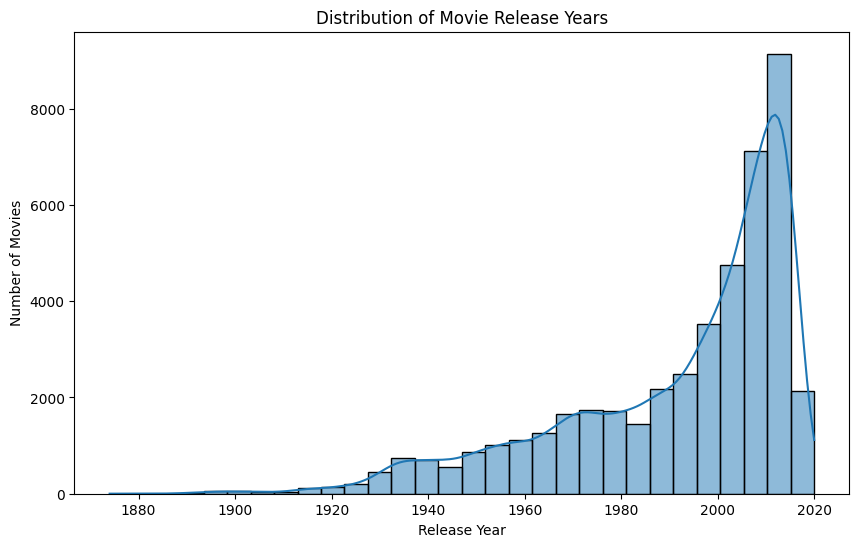

In [ ]:
# Chart - 1  Distribution of Movie Release Years (Histogram/KDE)

plt.figure(figsize=(10, 6))
sns.histplot(md['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

###**Chart-2: Distribution of Movie Budgets (Histogram/Box Plot)**

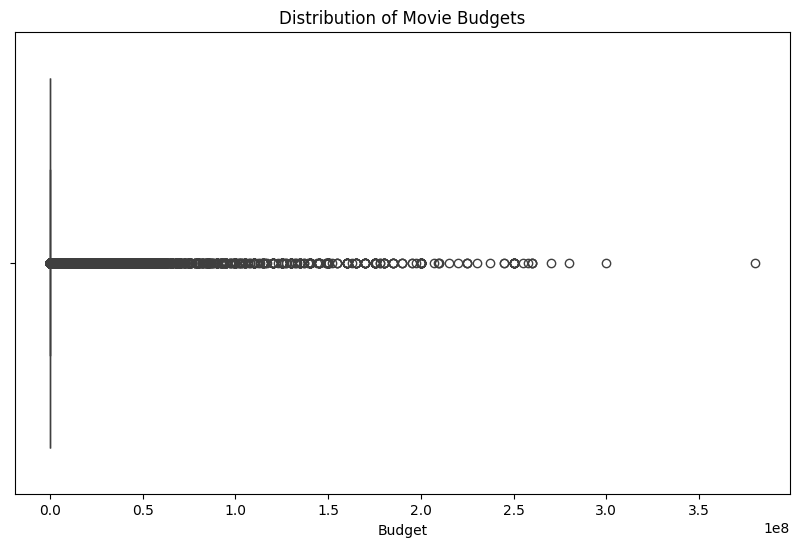

In [ ]:
# Chart-2: Distribution of Movie Budgets (Histogram/Box Plot)

plt.figure(figsize=(10, 6))
sns.boxplot(x=md['budget'])
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.show()

###**Chart-3: Distribution of Movie Revenue (Histogram/Box Plot)**

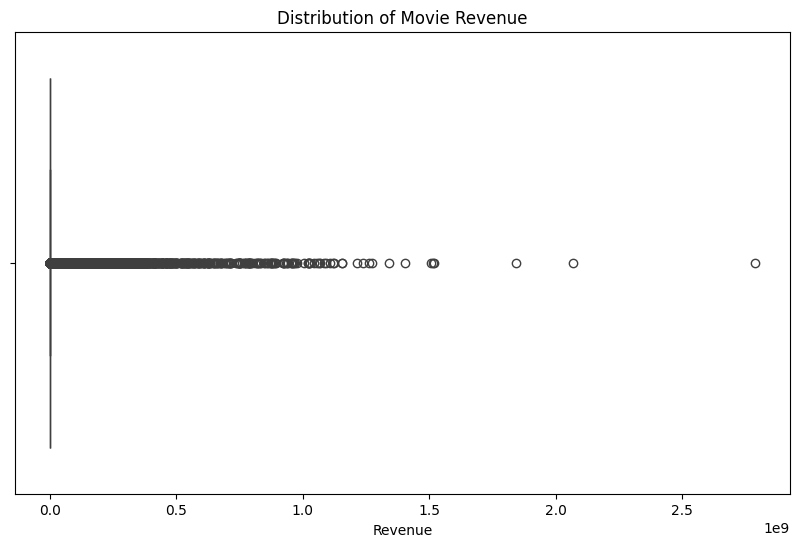

In [ ]:
# Chart - 3 Distribution of Movie Revenue (Histogram/Box Plot)

plt.figure(figsize=(10, 6))
sns.boxplot(x=md['revenue'])
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue')
plt.show()

###**Chart-4: Vote Average vs. Vote Count (Scatter Plot)**

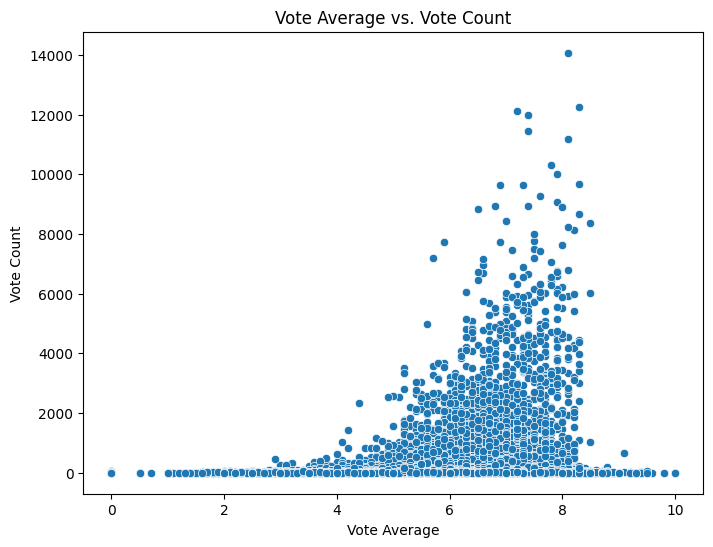

In [ ]:
# Chart - 4 Vote Average vs. Vote Count (Scatter Plot)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='vote_average', y='vote_count', data=md)
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()

###**Chart-5: Top Genres (Bar Chart)**

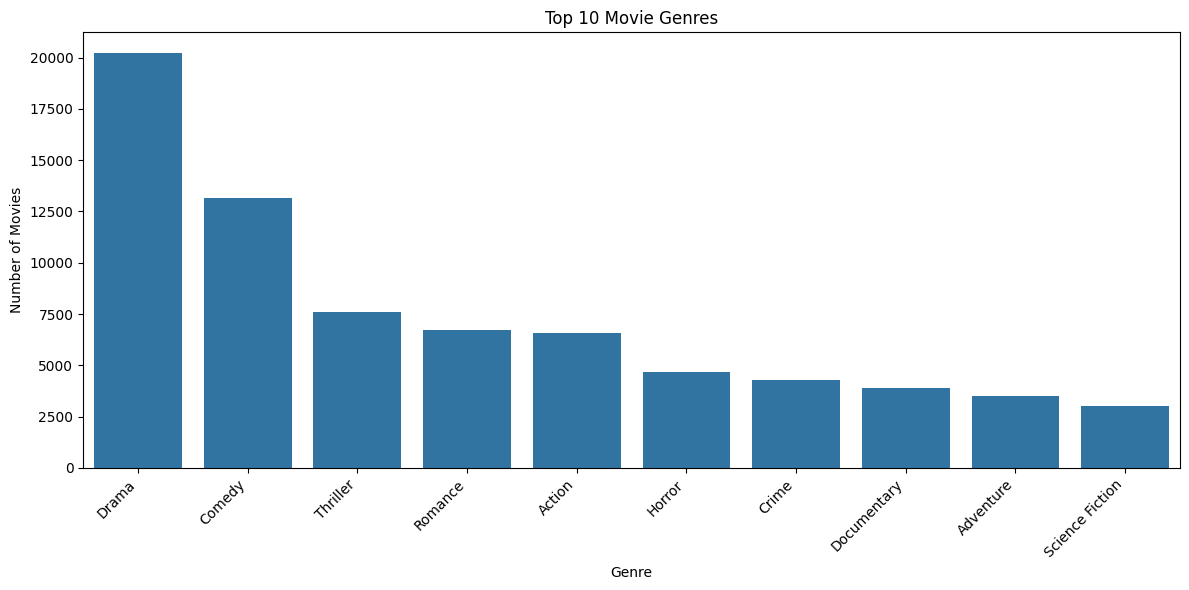

In [ ]:
# Chart - 5 Top Genres (Bar Chart)

from collections import Counter
genre_counts = Counter([genre for genres in md['genres'] for genre in genres])
top_genres = genre_counts.most_common(10) #Get top 10

plt.figure(figsize=(12, 6))
sns.barplot(x=[genre[0] for genre in top_genres], y=[genre[1] for genre in top_genres])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.tight_layout() #Adjusts plot to prevent labels from being cut off
plt.show()

###**Chart-6:Top Production Companies (Bar Chart)**

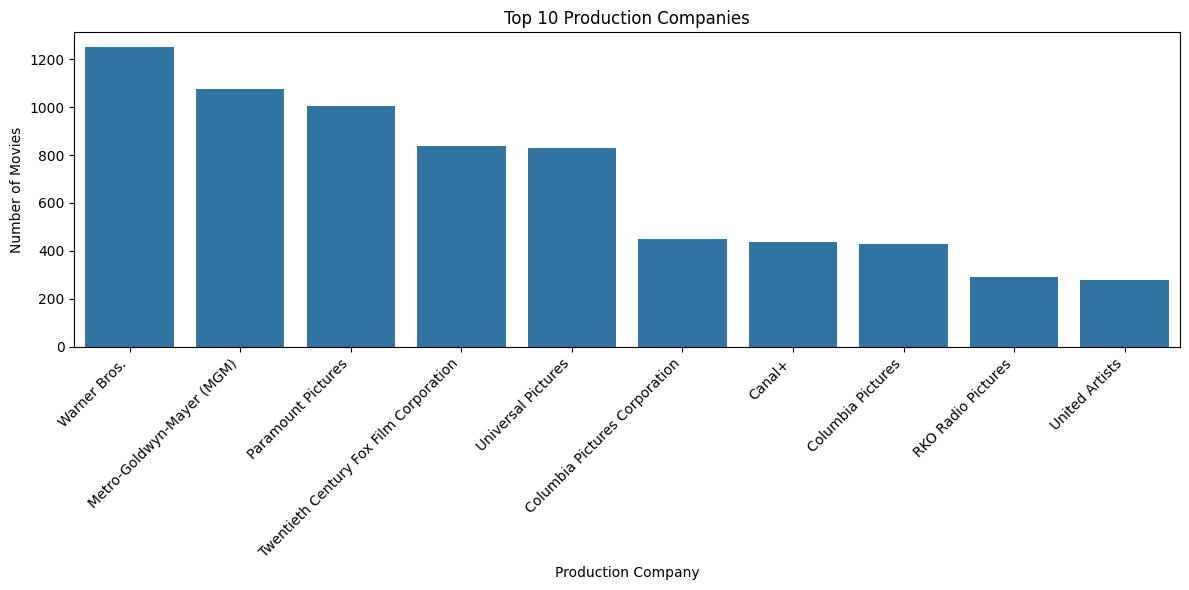

In [ ]:
#**Chart-6:Top Production Companies (Bar Chart)

production_counts = Counter([company for companies in md['production_companies'] for company in companies])
top_production = production_counts.most_common(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=[company[0] for company in top_production], y=[company[1] for company in top_production])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

###**Chart-7:Movie Runtime Distribution (Histogram/KDE)**

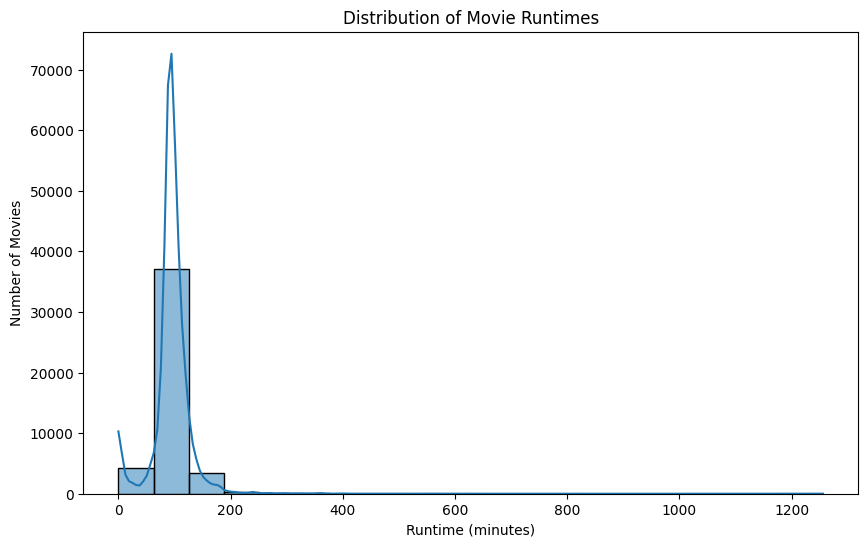

In [ ]:
#Chart-7:Movie Runtime Distribution (Histogram/KDE)

plt.figure(figsize=(10, 6))
sns.histplot(md['runtime'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

###**Chart-8:Correlation Heatmap (for numerical features)**

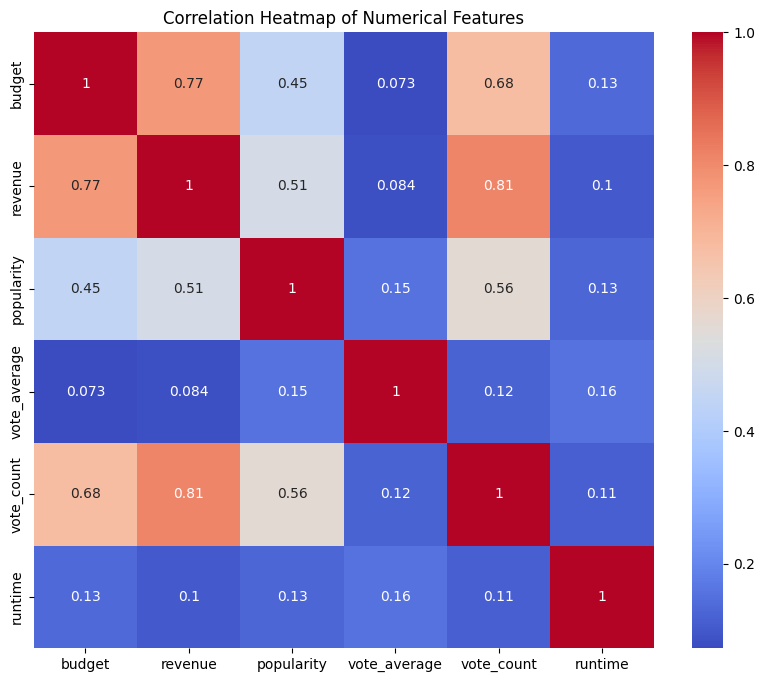

In [ ]:
#Chart-8:Correlation Heatmap (for numerical features)

numerical_features = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']
correlation_matrix = md[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

###**Chart-9: Number of Movies in Collections(Bar Chart)**

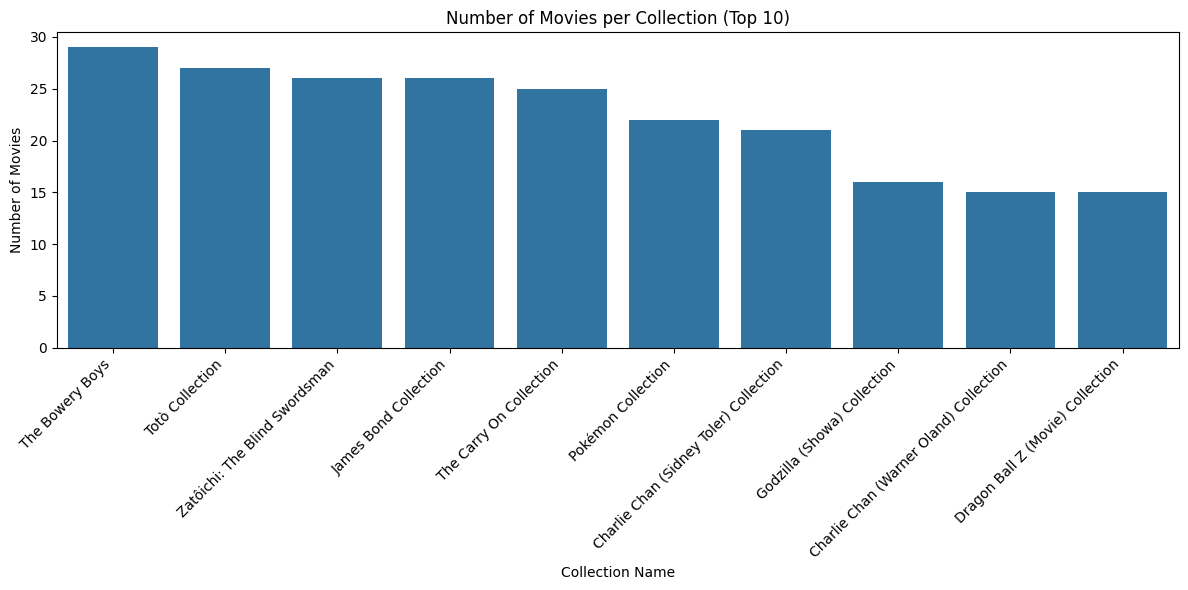

In [ ]:
#Chart-9 Number of Movies in Collections(Bar Chart)

# Filter out movies with "Unknown" collection name
filtered_md = md[md['collection_name'] != "Unknown"]

# Get collection counts excluding "Unknown"
collection_counts = filtered_md['collection_name'].value_counts().head(10) # Top 10 collections

# Rest of the code for plotting the bar chart remains the same

plt.figure(figsize=(12, 6))
sns.barplot(x=collection_counts.index, y=collection_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Movies per Collection (Top 10)')
plt.xlabel('Collection Name')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

###**Chart-10: Popularity vs. Release Year (Scatter Plot or Line Plot with Rolling Average)**

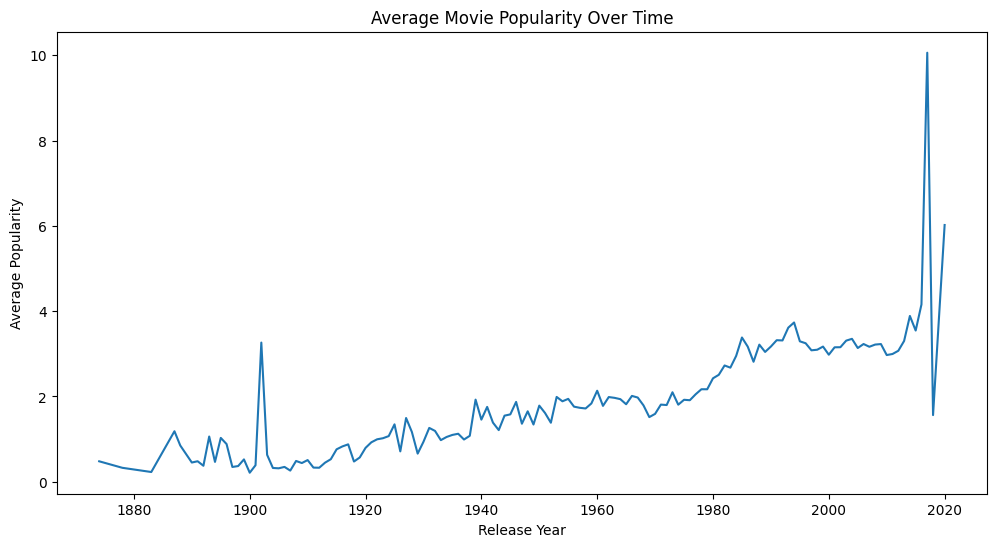

In [ ]:
#Chart-10:Popularity vs. Release Year (Scatter Plot or Line Plot with Rolling Average)

# Convert 'popularity' to numeric before calculating the mean
md['popularity'] = pd.to_numeric(md['popularity'], errors='coerce')

popularity_by_year = md.groupby('release_year')['popularity'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values)
plt.title('Average Movie Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

##**Recommendation Systems**

##**Simple Recommender:**



This recommender suggests movies based on simple metrics like popularity or average vote.


I use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) =  (vv+m.R)+(mv+m.C)


where,

* v is the number of votes for the movie
* m is the minimum votes required to be listed in the chart
* R is the average rating of the movie
* C is the mean vote across the whole report

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

I will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

In [ ]:
m = md['vote_count'].quantile(0.95) #Minimum votes required to be in the chart
m

435.0

In [ ]:
C = md['vote_average'].mean()
C

5.627840381810951

In [ ]:
qualified = md[(md['vote_count'] >= m)][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified.shape

(2268, 6)

In [ ]:
# Calculate weighted rating
v = qualified['vote_count']
R = qualified['vote_average']

In [ ]:
qualified['weighted_rating'] = (v / (v + m) * R) + (m / (v + m) * C)

In [ ]:
qualified = qualified.sort_values(['weighted_rating', 'popularity'], ascending=[False, False]).head(250)

Therefore, to qualify to be considered for the chart, a movie has to have at least 435 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.627 on a scale of 10 Movies qualify to be on our chart.

**Top Movies**

In [ ]:
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,weighted_rating
314,The Shawshank Redemption,1994,8358.0,8.5,51.645403,"[Drama, Crime]",8.357911
834,The Godfather,1972,6024.0,8.5,41.109264,"[Drama, Crime]",8.306566
12481,The Dark Knight,2008,12269.0,8.3,123.167259,"[Drama, Action, Crime, Thriller]",8.208502
2843,Fight Club,1999,9678.0,8.3,63.869599,[Drama],8.185060
292,Pulp Fiction,1994,8670.0,8.3,140.950236,"[Thriller, Crime]",8.172335
351,Forrest Gump,1994,8147.0,8.2,48.307194,"[Comedy, Drama, Romance]",8.069624
522,Schindler's List,1993,4436.0,8.3,41.725123,"[Drama, History, War]",8.061365
23673,Whiplash,2014,4376.0,8.3,64.29999,[Drama],8.058389
5481,Spirited Away,2001,3968.0,8.3,41.048867,"[Fantasy, Adventure, Animation, Family]",8.036001
1154,The Empire Strikes Back,1980,5998.0,8.2,19.470959,"[Adventure, Action, Science Fiction]",8.026070


In [ ]:
def build_chart(genre, percentile=0.85):
    """Builds a chart of top movies for a given genre."""
    try:
        qualified = md[md['genres'].apply(lambda x: genre in x)]
        if qualified.empty:
            print(f"No movies found for the genre: {genre}")
            return None

        v = qualified['vote_count']
        R = qualified['vote_average']
        m = qualified['vote_count'].quantile(percentile)
        C = qualified['vote_average'].mean()

        qualified['weighted_rating'] = (v / (v + m) * R) + (m / (v + m) * C)

        qualified = qualified.sort_values('weighted_rating', ascending=False).head(15)
        return qualified
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
# Example with Romance (using the build_chart function)
romance_chart = build_chart('Romance')
print("Top 15 Romance Movies:")
romance_chart[['title', 'year', 'vote_count', 'vote_average', 'weighted_rating', 'genres']]

Top 15 Romance Movies:


,title,year,vote_count,vote_average,weighted_rating,genres
10309,Dilwale Dulhania Le Jayenge,1995,661.0,9.1,8.701808,"[Comedy, Drama, Romance]"
40251,Your Name.,2016,1030.0,8.5,8.281588,"[Romance, Animation, Drama]"
351,Forrest Gump,1994,8147.0,8.2,8.173593,"[Comedy, Drama, Romance]"
1132,Cinema Paradiso,1988,834.0,8.2,7.964821,"[Drama, Romance]"
40882,La La Land,2016,4745.0,7.9,7.860662,"[Comedy, Drama, Music, Romance]"
22168,Her,2013,4215.0,7.9,7.855820,"[Romance, Science Fiction, Drama]"
7208,Eternal Sunshine of the Spotless Mind,2004,3758.0,7.9,7.850574,"[Science Fiction, Drama, Romance]"
876,Vertigo,1958,1162.0,8.0,7.840910,"[Mystery, Romance, Thriller]"
3189,City Lights,1931,444.0,8.2,7.793383,"[Comedy, Drama, Romance]"
15530,Mr. Nobody,2009,1616.0,7.9,7.788553,"[Science Fiction, Drama, Romance, Fantasy]"


In [ ]:
# Example with Action (using the build_chart function)
action_chart = build_chart('Action')
if action_chart is not None:
    print("\nTop 15 Action Movies:")
action_chart[['title', 'year', 'vote_count', 'vote_average', 'weighted_rating', 'genres']]


Top 15 Action Movies:


,title,year,vote_count,vote_average,weighted_rating,genres
12481,The Dark Knight,2008,12269.0,8.3,8.250401,"[Drama, Action, Crime, Thriller]"
1154,The Empire Strikes Back,1980,5998.0,8.2,8.104112,"[Adventure, Action, Science Fiction]"
15480,Inception,2010,14075.0,8.1,8.059855,"[Action, Thriller, Science Fiction, Mystery, A..."
7000,The Lord of the Rings: The Return of the King,2003,8226.0,8.1,8.032082,"[Adventure, Fantasy, Action]"
256,Star Wars,1977,6778.0,8.1,8.018045,"[Adventure, Action, Science Fiction]"
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892.0,8.0,7.939545,"[Adventure, Fantasy, Action]"
5814,The Lord of the Rings: The Two Towers,2002,7641.0,8.0,7.929934,"[Adventure, Fantasy, Action]"
23753,Guardians of the Galaxy,2014,10014.0,7.9,7.848396,"[Action, Science Fiction, Adventure]"
2458,The Matrix,1999,9079.0,7.9,7.843212,"[Action, Science Fiction]"
4135,Scarface,1983,3017.0,8.0,7.830102,"[Action, Crime, Drama, Thriller]"


#**Conclusion**

In this project, we successfully developed a simple movie recommender system. Leveraging the TMDB dataset, we implemented a weighted rating formula to identify top-rated movies based on popularity and user ratings.

We curated a list of the overall Top 250 movies. To further enhance the system, we also incorporated a genre-specific recommendation feature. By utilizing this functionality, we were able to generate lists of the Top 15 movies within the Action and Romance genres, respectively.

These recommendations offer a starting point for users to discover new movies, with potential for expansion and customization. The developed simple recommender system provides a foundation for further exploration and development of more sophisticated recommendation approaches in the future.